In [21]:
# import modules

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as mp
from matplotlib import pyplot as plt
pd.set_option("display.max_columns",1000)
pd.set_option('display.max_rows', 17544) 
# Configuring plotting visual and sizes
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/JattievdLinde/insights/main/data/Data.log')
df.head()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(['Timestamp'])

In [3]:
df.describe()

,Pressure,ProductTemp,Top,Middle,Bottom,Gas1,Gas2,Gas3,Gas4,Field,PSUTop,PSUMiddle,PSUBottom,TempChannel1,TempChannel2,TempChannel3,TempChannel4,TempChannel5,TempChannel6,TempChannel7,TempChannel8,HeliumPressure,StackTC,MagnetTC,PressureControl,RGAChannel1,RGAChannel2,RGAChannel3,RGAChannel4,RGAChannel5,RGAChannel6
count,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.0,2104.0,2104.0,2104.000000,2104.0,2104.0,2104.0,2104.0,2104.0,2104.0
mean,17.493335,173.774715,203.740019,203.037072,203.281369,0.106056,0.000050,-0.118089,-0.000029,0.607615,7.666302,12.946863,8.827091,41.151564,40.742923,52.850109,53.466730,2.805109,2.747034,2.823432,2.648094,0.0,594.0,0.0,17.511056,0.0,0.0,0.0,0.0,0.0,0.0
std,89.872384,143.291909,108.248228,109.237301,107.495532,0.140798,0.000219,0.006754,0.000377,0.481582,7.182892,9.318923,7.573806,0.032935,0.030673,0.010550,0.011475,0.006678,0.004712,0.005754,0.004001,0.0,0.0,0.0,89.868934,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,20.000000,20.000000,20.000000,-0.040000,0.000000,-0.140000,-0.005000,0.000000,0.000000,0.000000,0.000000,41.080000,40.670000,52.820000,53.440000,2.790000,2.740000,2.810000,2.640000,0.0,594.0,0.0,0.021000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000001,0.000000,84.000000,81.000000,86.000000,0.004000,0.000000,-0.120000,0.000000,0.000000,0.000000,7.175000,0.000000,41.130000,40.720000,52.840000,53.460000,2.800000,2.740000,2.820000,2.650000,0.0,594.0,0.0,0.027000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000003,300.000000,281.000000,277.000000,278.000000,0.004000,0.000000,-0.120000,0.000000,1.000000,10.300000,13.100000,12.500000,41.150000,40.740000,52.850000,53.470000,2.810000,2.750000,2.820000,2.650000,0.0,594.0,0.0,0.029000,0.0,0.0,0.0,0.0,0.0,0.0
75%,9.994000,300.000000,300.000000,301.000000,300.000000,0.300000,0.000000,-0.120000,0.000000,1.000000,10.600000,16.300000,13.300000,41.170000,40.760000,52.860000,53.480000,2.810000,2.750000,2.830000,2.650000,0.0,594.0,0.0,9.994000,0.0,0.0,0.0,0.0,0.0,0.0
max,762.900000,300.000000,300.000000,301.000000,301.000000,0.301000,0.001000,-0.060000,0.000000,1.000000,29.400000,40.000000,30.400000,41.230000,40.810000,52.890000,53.490000,2.830000,2.760000,2.840000,2.660000,0.0,594.0,0.0,762.900000,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.head(10)

,Timestamp,Pressure,ProductTemp,Top,Middle,Bottom,Gas1,Gas2,Gas3,Gas4,Field,PSUTop,PSUMiddle,PSUBottom,TempChannel1,TempChannel2,TempChannel3,TempChannel4,TempChannel5,TempChannel6,TempChannel7,TempChannel8,PiraniGauge,Element,HeliumPressure,StackTC,MagnetTC,PressureControl,RGAChannel1,RGAChannel2,RGAChannel3,RGAChannel4,RGAChannel5,RGAChannel6
0,2022-09-15 11:36:17.844,762.5,0,22,23,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.70,52.84,53.45,2.80,2.74,2.82,2.64,A AE+02,,0,594,0,762.5,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-09-15 11:36:27.844,762.2,0,22,23,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.84,53.46,2.79,2.74,2.82,2.64,A AE+02,,0,594,0,762.2,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-09-15 11:36:37.828,762.7,0,22,23,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.84,53.46,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.7,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-09-15 11:36:47.836,762.6,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.70,52.84,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.6,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-09-15 11:36:57.828,762.7,0,22,22,22,0.004,0.0,-0.14,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.84,53.46,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.7,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-09-15 11:37:07.844,762.4,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.84,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.4,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-09-15 11:37:17.836,762.5,0,22,22,22,0.003,0.0,-0.14,0.0,0.0,0.0,0.0,0.0,41.14,40.71,52.83,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.5,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-09-15 11:37:27.844,762.5,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.14,40.70,52.83,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.5,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-09-15 11:37:37.844,762.8,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.15,40.71,52.84,53.45,2.80,2.74,2.82,2.65,A AE+02,,0,594,0,762.8,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-09-15 11:37:47.836,762.7,0,22,22,22,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.15,40.71,52.84,53.46,2.80,2.74,2.82,2.64,A AE+02,,0,594,0,762.7,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
pd.DataFrame(df.columns,columns =['List of Columns'])

,List of Columns
0,Timestamp
1,Pressure
2,ProductTemp
3,Top
4,Middle
5,Bottom
6,Gas1
7,Gas2
8,Gas3
9,Gas4


In [6]:
df.nunique()

Timestamp          2104
Pressure            237
ProductTemp         198
Top                 280
Middle              282
Bottom              282
Gas1                  7
Gas2                  2
Gas3                  4
Gas4                  2
Field                86
PSUTop              198
PSUMiddle           323
PSUBottom           217
TempChannel1         16
TempChannel2         15
TempChannel3          8
TempChannel4          6
TempChannel5          5
TempChannel6          3
TempChannel7          4
TempChannel8          3
PiraniGauge          33
Element               3
HeliumPressure        1
StackTC               1
MagnetTC              1
PressureControl     140
RGAChannel1           1
RGAChannel2           1
RGAChannel3           1
RGAChannel4           1
RGAChannel5           1
RGAChannel6           1
dtype: int64

In [7]:
df = df.drop(columns=['PressureControl','StackTC','MagnetTC','HeliumPressure','RGAChannel1', 'RGAChannel2','RGAChannel3','RGAChannel4', 'RGAChannel5','RGAChannel6'])

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}).reset_index(drop=True)
missing_value_df

,column_name,percent_missing
0,Timestamp,0.0
1,Pressure,0.0
2,ProductTemp,0.0
3,Top,0.0
4,Middle,0.0
5,Bottom,0.0
6,Gas1,0.0
7,Gas2,0.0
8,Gas3,0.0
9,Gas4,0.0


In [9]:
df['Element'] = df['Element'].str.strip()
print(df['Element'].value_counts())
df=df.replace("","Vacuum")
print(df['Element'].value_counts())

Vacuum    1275
He         775
            54
Name: Element, dtype: int64
Vacuum    1329
He         775
Name: Element, dtype: int64


In [10]:
df.tail(10)

,Timestamp,Pressure,ProductTemp,Top,Middle,Bottom,Gas1,Gas2,Gas3,Gas4,Field,PSUTop,PSUMiddle,PSUBottom,TempChannel1,TempChannel2,TempChannel3,TempChannel4,TempChannel5,TempChannel6,TempChannel7,TempChannel8,PiraniGauge,Element
2094,2022-09-15 17:25:17.953,598.5,0,39,38,39,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.11,40.72,52.86,53.48,2.82,2.75,2.83,2.65,A AE+02,He
2095,2022-09-15 17:25:27.953,613.5,0,39,38,39,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.11,40.72,52.86,53.48,2.81,2.75,2.83,2.65,A AE+02,He
2096,2022-09-15 17:25:37.953,628.3,0,39,38,39,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.11,40.72,52.86,53.48,2.81,2.75,2.83,2.65,A AE+02,He
2097,2022-09-15 17:25:47.953,643.6,0,39,38,39,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.10,40.72,52.86,53.48,2.81,2.75,2.83,2.66,A AE+02,He
2098,2022-09-15 17:25:57.953,659.2,0,39,38,39,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.11,40.72,52.86,53.48,2.81,2.76,2.83,2.65,A AE+02,He
2099,2022-09-15 17:26:07.953,674.6,0,39,38,39,0.003,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.11,40.72,52.86,53.48,2.82,2.75,2.83,2.65,A AE+02,He
2100,2022-09-15 17:26:17.953,689.6,0,39,38,38,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.11,40.72,52.86,53.48,2.81,2.75,2.83,2.65,A AE+02,He
2101,2022-09-15 17:26:27.953,706.8,0,39,38,38,0.003,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.10,40.72,52.86,53.48,2.81,2.75,2.83,2.65,A AE+02,He
2102,2022-09-15 17:26:37.953,762.9,0,39,37,38,0.004,0.0,-0.12,0.0,0.0,0.0,0.0,0.0,41.10,40.72,52.86,53.48,2.81,2.75,2.83,2.65,A AE+02,He
2103,2022-09-15 17:26:47.953,762.5,0,39,37,38,0.004,0.0,-0.06,0.0,0.0,0.0,0.0,0.0,41.10,40.71,52.87,53.48,2.81,2.75,2.83,2.65,A AE+02,He


In [11]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pressure,ProductTemp,Top,Middle,Bottom,Gas1,Gas2,Gas3,Gas4,Field,PSUTop,PSUMiddle,PSUBottom,TempChannel1,TempChannel2,TempChannel3,TempChannel4,TempChannel5,TempChannel6,TempChannel7,TempChannel8
Pressure,1.000000,-0.234597,-0.278433,-0.276665,-0.278769,-0.061745,-0.013761,-0.008193,-0.000495,-0.187348,-0.206993,-0.238631,-0.224973,-0.109147,-0.099150,0.070915,0.088567,0.052074,0.007968,0.070656,0.051339
ProductTemp,-0.234597,1.000000,0.857915,0.866834,0.856311,-0.830205,-0.204999,-0.051198,0.000630,0.040643,0.759364,0.405126,0.869210,-0.247463,-0.208205,-0.609067,-0.579822,-0.224398,-0.269262,0.081520,-0.240717
Top,-0.278433,0.857915,1.000000,0.999772,0.999676,-0.570636,-0.138631,-0.035537,-0.011438,0.342237,0.460217,0.174875,0.603636,0.060253,0.120404,-0.389150,-0.366593,-0.099527,-0.025266,0.054691,-0.068389
Middle,-0.276665,0.866834,0.999772,1.000000,0.999492,-0.583171,-0.141723,-0.036629,-0.011417,0.334115,0.470890,0.178070,0.614241,0.049012,0.111463,-0.396614,-0.373750,-0.101353,-0.030900,0.061304,-0.071577
Bottom,-0.278769,0.856311,0.999676,0.999492,1.000000,-0.565797,-0.137588,-0.034303,-0.010666,0.352026,0.446384,0.163284,0.592516,0.061318,0.129173,-0.377181,-0.353541,-0.088366,-0.010762,0.065931,-0.059358
Gas1,-0.061745,-0.830205,-0.570636,-0.583171,-0.565797,1.000000,0.248733,0.070097,0.015095,0.207612,-0.743946,-0.387785,-0.791847,0.332704,0.369466,0.707050,0.684316,0.329392,0.446200,-0.061011,0.345736
Gas2,-0.013761,-0.204999,-0.138631,-0.141723,-0.137588,0.248733,1.000000,0.012059,0.017445,0.057353,-0.187674,-0.116795,-0.199781,0.104549,0.121891,0.164483,0.169830,0.103638,0.121944,-0.005192,0.088026
Gas3,-0.008193,-0.051198,-0.035537,-0.036629,-0.034303,0.070097,0.012059,1.000000,0.002737,0.099522,-0.041959,0.016332,-0.048257,-0.032251,-0.004477,0.101178,0.094158,0.049141,0.100449,0.012300,0.085565
Gas4,-0.000495,0.000630,-0.011438,-0.011417,-0.010666,0.015095,0.017445,0.002737,1.000000,0.003820,-0.001586,0.004852,-0.000146,-0.023238,-0.021595,0.006769,0.005920,0.010694,0.005909,0.001293,-0.004530
Field,-0.187348,0.040643,0.342237,0.334115,0.352026,0.207612,0.057353,0.099522,0.003820,1.000000,-0.267385,-0.126984,-0.195095,0.425799,0.623839,0.379769,0.430294,0.314111,0.701853,0.257154,0.570357


In [12]:
fig = px.line(df, x='Timestamp', y="ProductTemp")
fig.show()

In [13]:
fig = px.line(df, x='Timestamp', y="PSUTop")
fig.show()

In [14]:
fig = px.line(df, x='Timestamp', y="Field")
fig.show()

<AxesSubplot:xlabel='Element', ylabel='ProductTemp'>

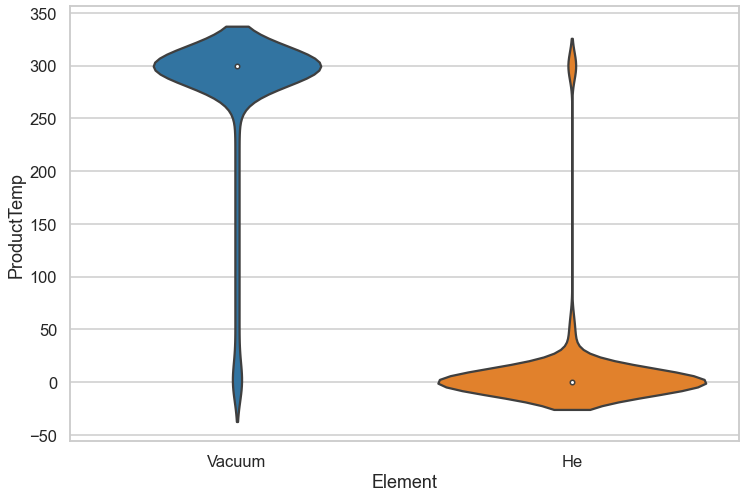

In [15]:

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Element', y='ProductTemp', data=df)


<AxesSubplot:xlabel='Element', ylabel='Pressure'>

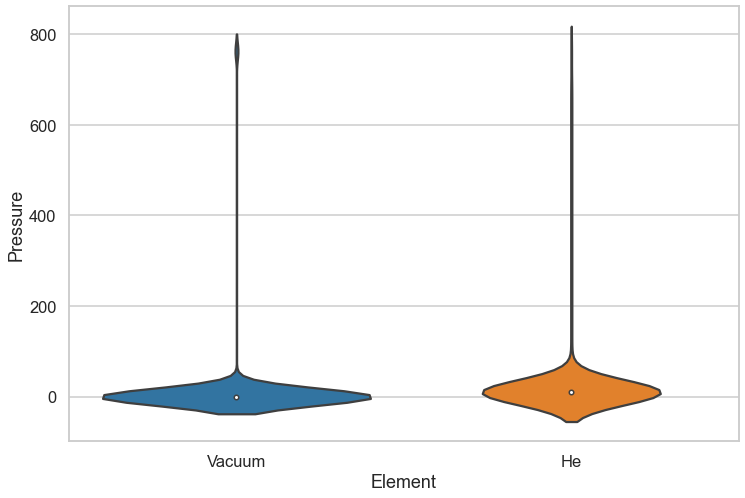

In [16]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
plt.figure(figsize=(12,8)) # Set plot dimensions
sns.violinplot(x='Element', y='Pressure', data=df)

<AxesSubplot:xlabel='PSUMiddle', ylabel='Count'>

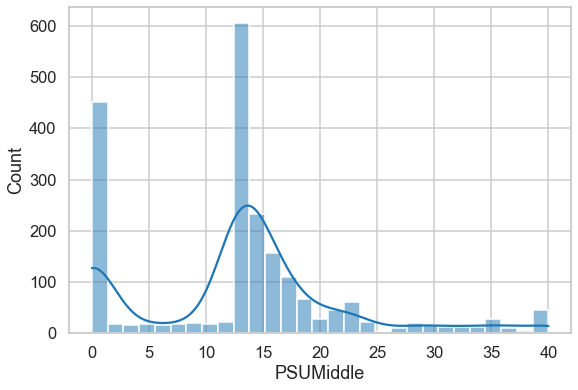

In [17]:
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(9,6))
sns.histplot(df, x='PSUMiddle',
             kde=True) # Plot the density curve too

In [23]:
avg_temp_element = df.groupby(['Element'])['ProductTemp','Pressure','TempChannel1','Field','Top','PSUTop','PSUMiddle','PSUBottom'].mean().reset_index()
avg_temp_element

/var/folders/x0/gtq_bg6143g6b4v5lln894bm0000gn/T/ipykernel_25323/569817553.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Element,ProductTemp,Pressure,TempChannel1,Field,Top,PSUTop,PSUMiddle,PSUBottom
0,0,9.660645,32.689895,41.163639,0.699498,114.000000,0.298968,7.479742,0.545419
1,1,269.477050,8.631533,41.144522,0.554034,256.071482,11.962528,16.134989,13.656509


In [22]:
conditions = [
    (df['Element'] == "He"),
   (df['Element'] == "Vacuum")
    ]
values = [0,1]
df['Element'] = np.select(conditions, values)

In [24]:
df.columns

Index(['Timestamp', 'Pressure', 'ProductTemp', 'Top', 'Middle', 'Bottom',
       'Gas1', 'Gas2', 'Gas3', 'Gas4', 'Field', 'PSUTop', 'PSUMiddle',
       'PSUBottom', 'TempChannel1', 'TempChannel2', 'TempChannel3',
       'TempChannel4', 'TempChannel5', 'TempChannel6', 'TempChannel7',
       'TempChannel8', 'PiraniGauge', 'Element'],
      dtype='object')

In [ ]:
X_class = np.array(df[['ProductTemp','Pressure','TempChannel1','Field','Top', 'Middle', 'Bottom','PSUTop','PSUMiddle','PSUBottom','Gas1','PiraniGauge']])
Y_class = np.array(df[['Element']])

# Transformed dataset is randomly split into 70:30 to accommodate the training and testing phases
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(X_class,Y_class, test_size = 0.3,random_state=0)
print("X_train has these samples:", x_train_class.shape)
print("X_test has these samples:", x_test_class.shape)
print("Y_train has these samples:", len(y_train_class))
print("Y_train has these samples:", len(y_test_class))